In [1]:
import os
import sys
import pandas as pd
# Ensure the script directory is in the Python path
sys.path.append('/app/scripts')

from TabularDataset import TabularDataset
from TabNetModelTester import TabNetModelTester
from SimpleTrainingMetricsPlotter import SimpleTrainingMetricsPlotter



In [2]:
# Main folder
root_dir  = '/app'

# Data folders
data_folder = os.path.join(root_dir, 'data')

# Training data paths
radiomics_train_val_path = os.path.join(data_folder, 'radiomics_features_train_val.csv')
deep_learning_train_val_path = os.path.join(data_folder, 'deep_features_train_val.csv')

# Test data paths
radiomics_test_path = os.path.join(data_folder, 'radiomics_features_test.csv')
deep_learning_test_path = os.path.join(data_folder, 'deep_features_test.csv')

# Model folder
models_folder = os.path.join(root_dir, 'models')

# Train data folder
train_data = os.path.join(root_dir, 'training_data')

In [3]:
# Load the test dataset
test_dataset = TabularDataset(
    csv_file1=radiomics_test_path, 
    csv_file2=deep_learning_test_path, 
    target_column='dx'
)

# Extract unique class names from the test dataset
class_names = list(set(test_dataset.target))  # Extract unique class names from the target column

best_model_paths = [os.path.join(models_folder, f'best_model_fold_{i+1}.zip') for i in range(5)]

# Test the models
tester = TabNetModelTester(
    test_dataset=test_dataset, 
    num_classes=len(class_names), 
    class_names=class_names,  # Provide class names derived from the dataset
    batch_size=32
)

# Test all models across folds and get the classification reports
reports_per_fold, mean_report = tester.test_all_folds(best_model_paths)

Testing Fold 1


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Testing Fold 2


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Testing Fold 3


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Testing Fold 4


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Testing Fold 5


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [4]:
mean_report

,f1-score,precision,recall,support
accuracy,0.795764,0.795764,0.795764,0.795764
akiec,0.555930,0.567706,0.546199,171.000000
bcc,0.640555,0.839960,0.520000,35.000000
bkl,0.891782,0.848993,0.939207,908.000000
df,0.615122,0.846146,0.490909,44.000000
macro avg,0.657078,0.741380,0.605211,1511.000000
mel,0.689038,0.758861,0.631336,217.000000
nv,0.508334,0.549753,0.474419,43.000000
vasc,0.698783,0.778242,0.634409,93.000000
weighted avg,0.787990,0.791053,0.795764,1511.000000


In [5]:
reports_per_fold

[{'nv': {'precision': 0.5675675675675675,
   'recall': 0.4883720930232558,
   'f1-score': 0.525,
   'support': 43.0},
  'vasc': {'precision': 0.7974683544303798,
   'recall': 0.6774193548387096,
   'f1-score': 0.7325581395348837,
   'support': 93.0},
  'mel': {'precision': 0.7336956521739131,
   'recall': 0.6221198156682027,
   'f1-score': 0.6733167082294265,
   'support': 217.0},
  'df': {'precision': 0.7878787878787878,
   'recall': 0.5909090909090909,
   'f1-score': 0.6753246753246753,
   'support': 44.0},
  'akiec': {'precision': 0.5947712418300654,
   'recall': 0.5321637426900585,
   'f1-score': 0.5617283950617284,
   'support': 171.0},
  'bkl': {'precision': 0.8464606181455633,
   'recall': 0.9350220264317181,
   'f1-score': 0.8885400313971743,
   'support': 908.0},
  'bcc': {'precision': 0.9090909090909091,
   'recall': 0.5714285714285714,
   'f1-score': 0.7017543859649122,
   'support': 35.0},
  'accuracy': 0.7974851091992058,
  'macro avg': {'precision': 0.7481333044453123,
  

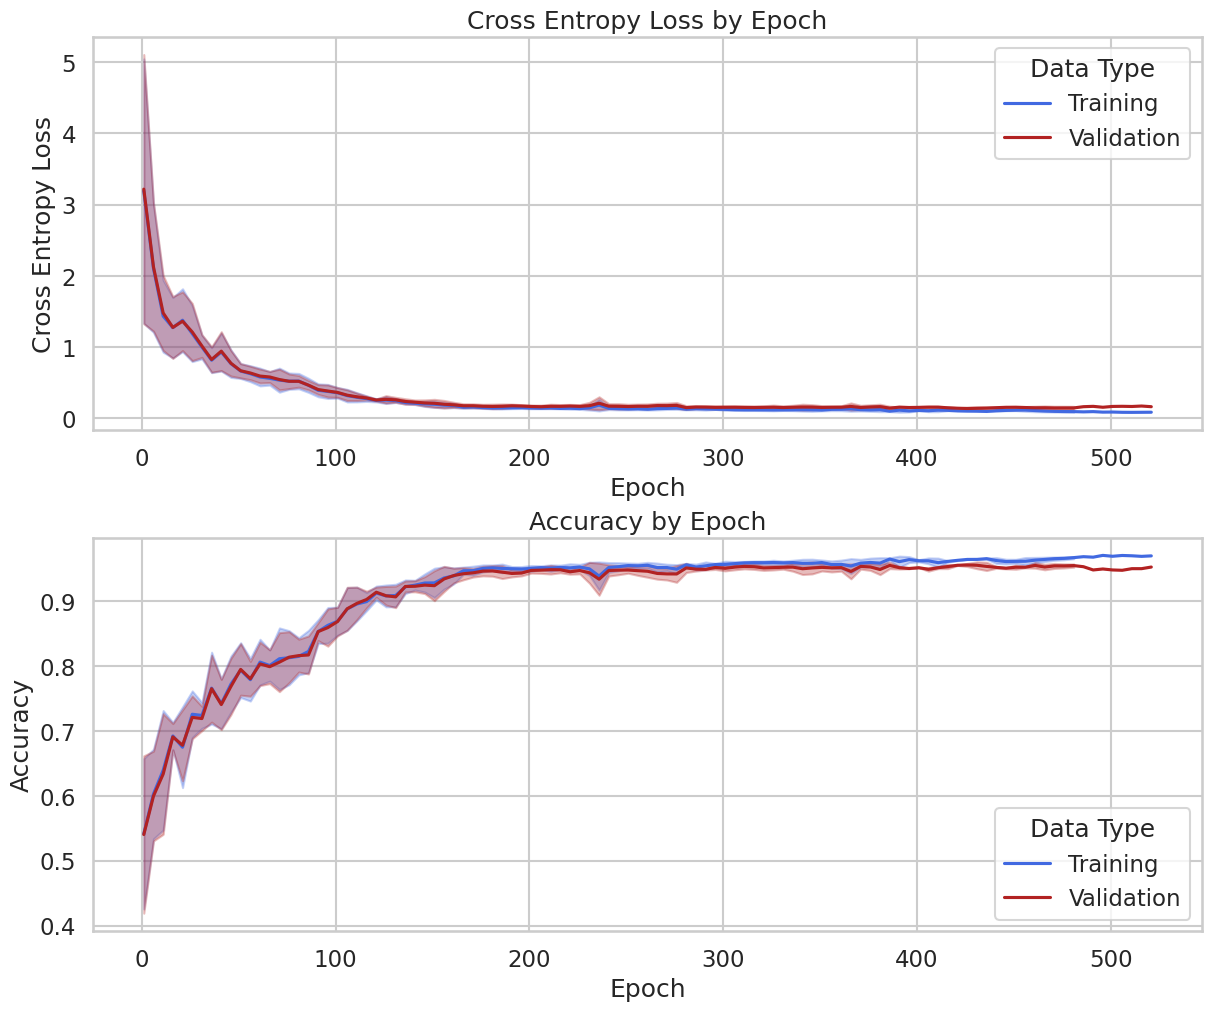

In [6]:
# Plot Metrics (e.g., accuracy per fold)
result_df = pd.read_csv(os.path.join(train_data, 'cross_validation_results.csv'))
plotter = SimpleTrainingMetricsPlotter(result_df)
plotter.plot_metrics(downsample=5, marker_size=2)


In [8]:
X = test_dataset.features

In [9]:
X

array([[ 5.39166534e-01,  1.64321454e+02,  1.70425937e+02, ...,
         1.84113400e-02, -6.85135050e-02, -1.31830740e-01],
       [ 7.38328062e-01,  1.40525305e+02,  1.44069428e+02, ...,
         2.52779830e-02,  1.04206294e-01, -8.81149000e-02],
       [ 6.68727580e-01,  1.61128912e+02,  1.66595318e+02, ...,
         1.49870540e-01,  1.91974330e-01, -8.05713760e-02],
       ...,
       [ 5.91433579e-01,  1.22899214e+02,  1.24064499e+02, ...,
        -3.13764440e-02,  5.92823900e-01, -1.42163280e-01],
       [ 8.58078383e-01,  2.58226782e+02,  2.94431656e+02, ...,
         7.96656670e-01,  4.00356700e-01, -1.81439400e-01],
       [ 6.19521545e-01,  2.34431037e+02,  2.27246562e+02, ...,
         5.76892440e-01, -5.18179900e-03,  5.01620530e-01]])

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetClassifier

X = test_dataset.features

# Load the trained model
clf = TabNetClassifier()
clf.load_model('/app/models/best_model_fold_3.zip')

# Assuming X_train is your training dataset
explain_matrix, masks = clf.explain(X)

# Calculate mean importance over the entire dataset
feature_importances = explain_matrix.mean(axis=0)

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [11]:
feature_importances

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the feature names in a list called 'feature_names'
feature_names = X.columns.tolist()  # if X_train is a DataFrame

# Sort features by importance
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance Score')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'